# Tâche 8 : ph_bands

Calculez la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin pour le matériau attribué.

In [27]:
from pymatgen.ext.matproj import MPRester
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.phonon.plotter import PhononBSPlotter

mp_key = "XmhOs3iaP3YopOzhwHSd0LHcduZB1r1h"
mp_id = "mp-31451"
material_name = "ZrCoBi"

# Récupération de la structure des bandes des phonons
with MPRester(mp_key) as m:    
    band = m.get_phonon_bandstructure_by_material_id(mp_id)
    
# Récupération des données de notre matériau
phonon_plot = PhononBSPlotter(band)
data = phonon_plot.bs_plot_data()
frequency = data['frequency']
distances = data['distances']
direction = data['ticks'].get('label')

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## 0. Choix des branches accoustiques et des directions dans la zone de Brillouin

Par définition, les branches accoustiques sont définies comme étant des bandes de phonons qui ont une fréquence nulle lorsque le vecteur d'onde tend vers 0, à savoir au centre de la zone de Brillouin. Nous allons déterminer 3 branches accoustiques et 3 directions différentes de la zone de Brillouin par leur représentation.


Structure de bande des phonons du ZrCoBi:


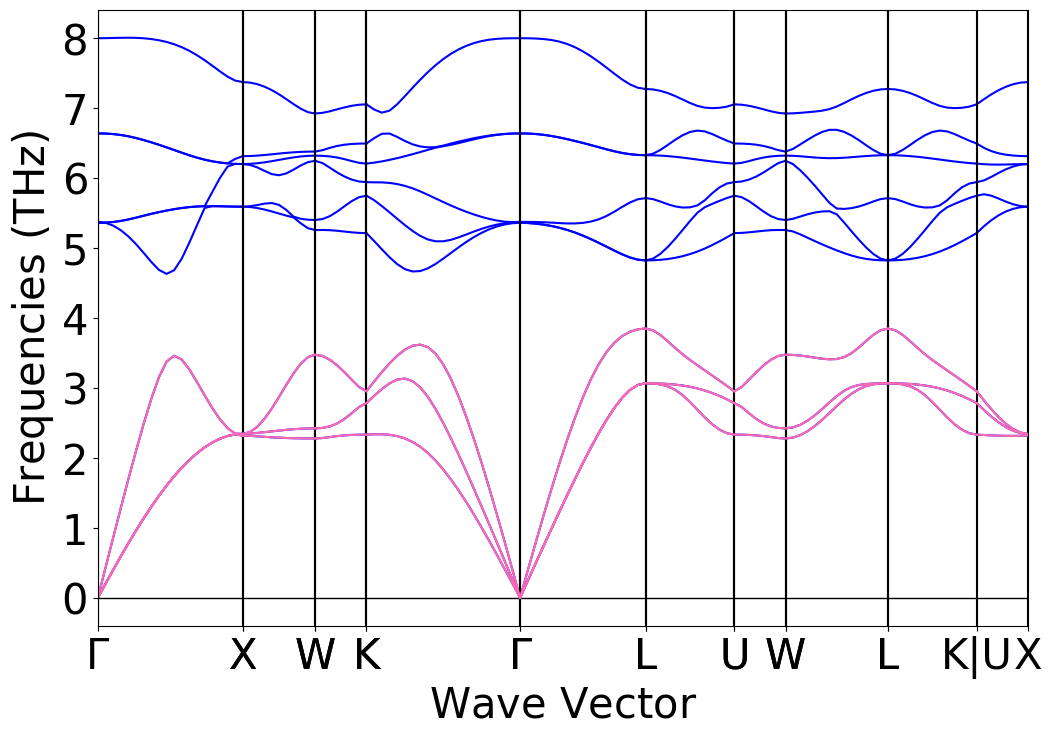

In [28]:
print("\nStructure de bande des phonons du ZrCoBi:")
data = phonon_plot.bs_plot_data()
frequency = data['frequency']
distances = data['distances']
phonon_plot.get_plot()
for i in range(len(distances)): 
    plt.plot(distances[i],frequency[i][0],'hotpink')  
    plt.plot(distances[i],frequency[i][1],'hotpink')   
    plt.plot(distances[i],frequency[i][2],'hotpink') 

On voit bien sur cette représentation que les branches accoustiques correspondent aux 3 premières bandes (mises en évidence en rose).


Zone de Brillouin:


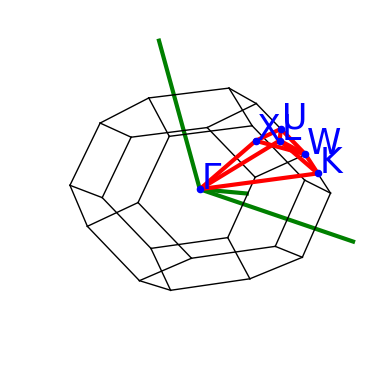

In [29]:
print("\nZone de Brillouin:")
PhononBSPlotter(band).plot_brillouin()

Enfin, on remarque que le centre de la zone de Brillouin correspond à $\Gamma$ . Les 3 directions choisies sont donc $\Gamma-X$ , $K-\Gamma$ et $\Gamma-L$ .

## 1. Calcul de la vitesse du son pour la première branche accoustique, direction $\Gamma-X$

Vitesse de propagation du son : 2335.0720529395967 [m/s]



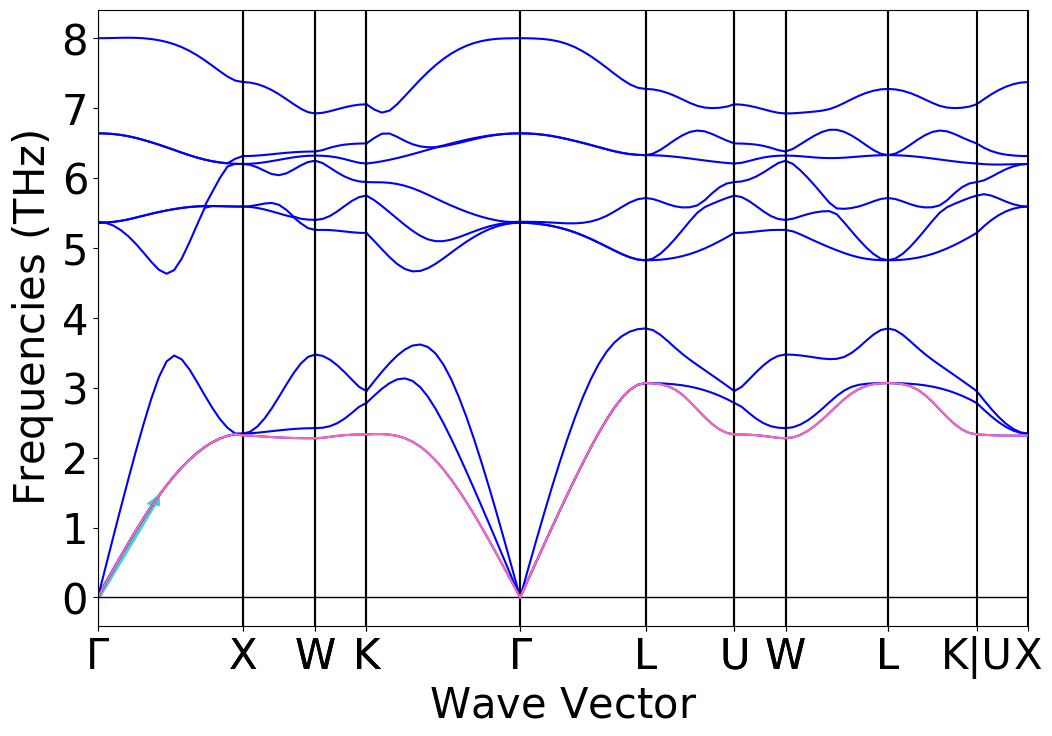

In [30]:
# Calcul de la vitesse du son
# Multiplication par 10^12 car les fréquences sont données en [THz]
# Division par 10^10 car les distances sont données en [Å]
band1 = frequency[0][0]
vitesse_1 = 2*np.pi*np.abs((band1[1]-band1[0])*(10**12))/((distances[0][1]-distances[0][0])*(10**10))
print("Vitesse de propagation du son : {} [m/s]\n".format(vitesse_1))

# Représentation de la vitesse (pente de la courbe)
PhononBSPlotter(band).get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][0], color = 'hotpink')
plt.arrow(distances[0][0],band1[0],distances[0][8]-distances[0][0],band1[8]-band1[0], color='mediumturquoise',width = 0.03,length_includes_head =True)


## 2. Calcul de la vitesse du son pour la deuxième branche accoustique, direction $K-\Gamma$ 

Vitesse de propagation du son : 3036.1085182824595 [m/s]



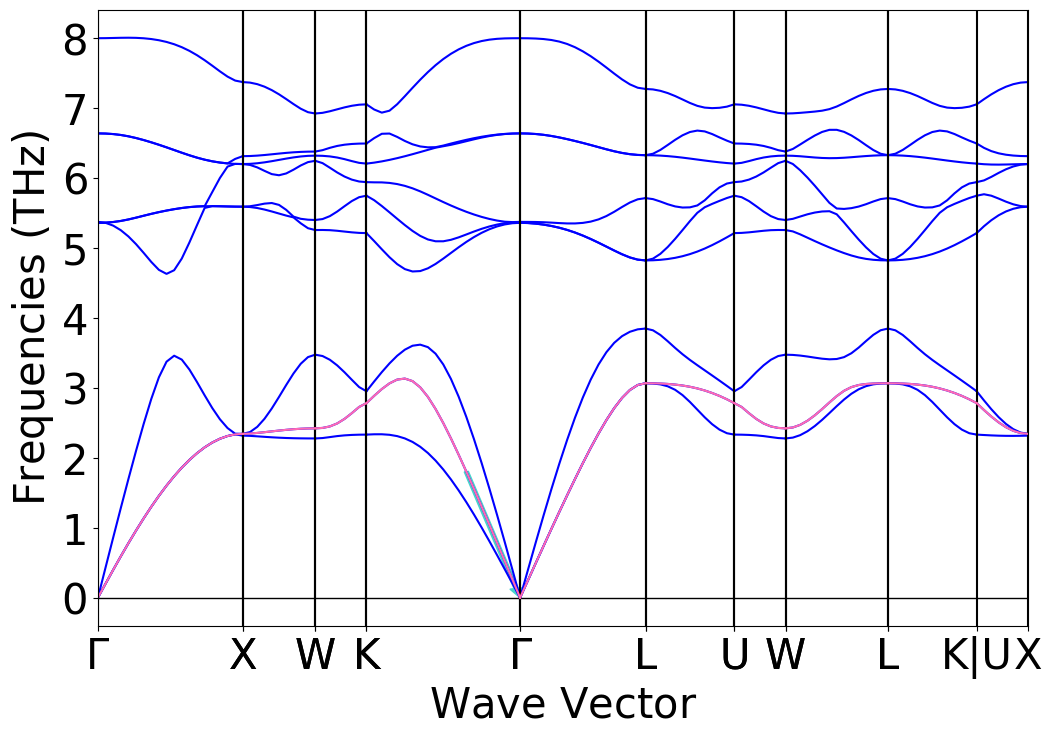

In [31]:
# Calcul de la vitesse du son
band2 = frequency[3][1]
vitesse_2 = 2*np.pi*np.abs((band2[-1]-band2[-2])*(10**12))/((distances[3][-1]-distances[3][-2])*(10**10))
print("Vitesse de propagation du son : {} [m/s]\n".format(vitesse_2))

# Représentation de la vitesse
PhononBSPlotter(band).get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][1], color = 'hotpink')
plt.arrow(distances[3][13],band2[13],distances[3][-1]-distances[3][13],band2[-1]-band2[13], color='mediumturquoise',width = 0.03,length_includes_head =True)

## 3. Calcul de la vitesse du son pour la troisième branche accoustique, direction $\Gamma-L$

Vitesse de propagation du son : 4519.246827590653 [m/s]



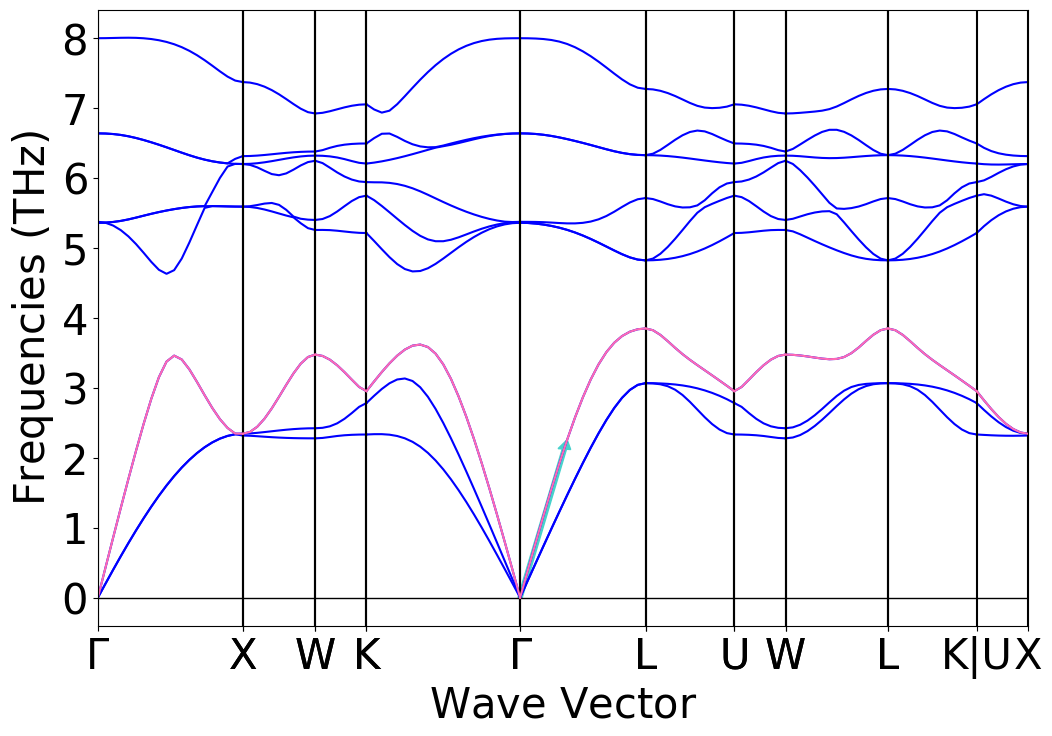

In [32]:
# Calcul de la vitesse du son
band3 = frequency[4][2]
vitesse_3 = 2*np.pi*np.abs((band3[1]-band3[0])*(10**12))/((distances[4][1]-distances[4][0])*(10**10))
print("Vitesse de propagation du son : {} [m/s]\n".format(vitesse_3))

# Représentation de la vitesse
PhononBSPlotter(band).get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][2], color = 'hotpink')
plt.arrow(distances[4][0],band3[0],distances[4][6]-distances[4][0],band3[6]-band3[0], color='mediumturquoise',width = 0.03,length_includes_head =True)


## 4. Explications

La vitesse de propagation du son est identique à la vitesse de propagation d'un phonon dans la zone de Brillouin. Elle est définie par : $v_s = \frac{∂ω}{∂q} = 2π \frac{∂f}{∂q}$

avec ω la fréquence angulaire, q le vecteur d'onde et f la fréquence.

La vitesse du son a été calculée pour chaque branche acoustique et une direction donnée en calculant la pente de la tangente à cette branche pour une fréquence nulle.